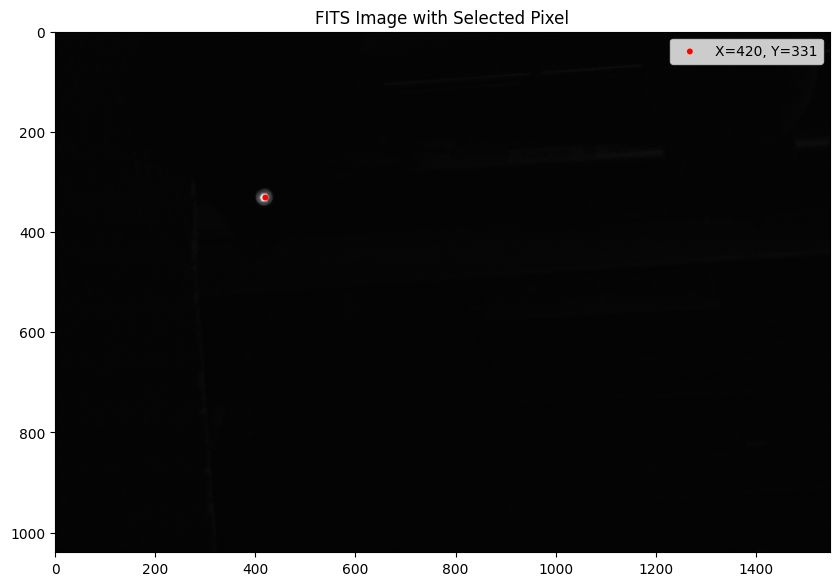

Selected Pixel Coordinates: X = 420, Y = 331


In [25]:
import matplotlib.pyplot as plt
from astropy.io import fits
import os
import numpy as np

# --- Configuration ---
# Replace this with your actual fits directory path
fits_dir = "/home/declan/RPI/readout/exposures-20250620-184353-495/processed/fits"

# Get the first FITS file
fits_files = sorted([f for f in os.listdir(fits_dir) if f.endswith(".fits")])
if not fits_files:
    raise FileNotFoundError("No FITS files found in the directory")

fits_file = fits_files[0]
fits_path = os.path.join(fits_dir, fits_file)

# Load image data
with fits.open(fits_path) as hdul:
    if "GREEN1" in hdul:
        image = hdul["GREEN1"].data
    else:
        image = hdul[0].data

# --- Manual pixel selection ---
# Set your pixel location here
x_pix = 420
y_pix = 331

# Validate bounds
if not (0 <= x_pix < image.shape[1]) or not (0 <= y_pix < image.shape[0]):
    raise ValueError(f"Pixel ({x_pix},{y_pix}) is out of image bounds {image.shape}")

# --- Plot image with marker ---
fig, ax = plt.subplots(figsize=(10, 8))
ax.imshow(image, cmap='gray')
ax.scatter(x_pix, y_pix, s=5, edgecolor='red', facecolor='none', linewidth=2, label=f"X={x_pix}, Y={y_pix}")
ax.set_title("FITS Image with Selected Pixel")
ax.legend()
plt.grid(False)
plt.show()

print(f"Selected Pixel Coordinates: X = {x_pix}, Y = {y_pix}")

Brightest pixel value: 253
Coordinates (x, y): (412, 333)


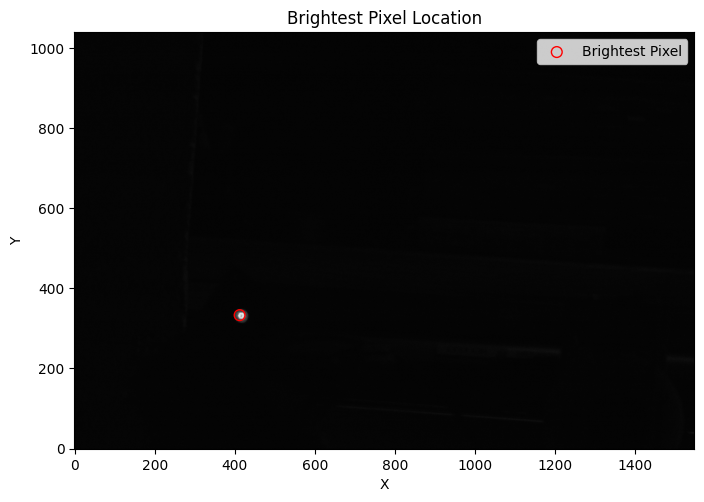

In [29]:
# Find the coordinates of the brightest pixel
max_val = np.max(image)
brightest_coords = np.unravel_index(np.argmax(image), image.shape)

print(f"Brightest pixel value: {max_val}")
print(f"Coordinates (x, y): ({brightest_coords[1]}, {brightest_coords[0]})")  # (x, y) = (col, row)

# Optional: plot and mark the brightest pixel
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.imshow(image, cmap='gray', origin='lower')
plt.scatter(brightest_coords[1], brightest_coords[0], s=60, edgecolor='red', facecolor='none', label='Brightest Pixel')
plt.legend()
plt.title("Brightest Pixel Location")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()